In [2]:
#auto reload magic
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [13]:
from data import YOLODataset
ds = YOLODataset('dataset/train', all_label=0)

Loading data...: 100%|██████████| 187/187 [00:00<00:00, 797.56it/s]


In [14]:
import cv2

def draw_yolo_bounding_boxes(image, boxes):
    
    img_h, img_w, _ = image.shape

    for box in boxes:
        xc, yc, w, h = box
        coords = (img_w*(xc-w/2), img_h*(yc-h/2), img_w*(xc+w/2), img_h*(yc+h/2))
        coords = [int(i) for i in coords]

        print(coords)

        cv2.rectangle(image, (coords[0], coords[1]), (coords[2], coords[3]), (0, 255, 0), 2)
    
    return image


from matplotlib import pyplot as plt

def show_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()


In [15]:
#augmentations

import albumentations as A

def do_transform(d):


    blur = A.OneOf(
        [
            A.MotionBlur(),
            A.Defocus(),
        ], 

        p=0.7
    )

    transform = A.Compose([
        blur,
        A.Downscale(),
        A.RGBShift(),
        A.RandomBrightnessContrast(),
        A.CoarseDropout(),
        A.Perspective(),
        A.SafeRotate()
    ], bbox_params=A.BboxParams(format='yolo',  label_fields=['labels']))

    transformed = transform(image=d['image'], bboxes=d['boxes'], labels=d['labels'])

    res = {
        'image': transformed['image'],
        'boxes': transformed['bboxes'],
        'labels': transformed['labels']
    }
    return res

In [16]:
from torch.utils.data import ConcatDataset

AUGMENT_FACTOR = 3

augmented_datasets = [YOLODataset('dataset/train', transform=lambda d: do_transform(d)) for _ in range(AUGMENT_FACTOR)]

big_ds = ConcatDataset([ds] + augmented_datasets)

Loading data...: 100%|██████████| 187/187 [00:00<00:00, 775.81it/s]


In [20]:
print(len(ds))
print(len(big_ds))

187
748


In [26]:
from tqdm import tqdm
import numpy
def save_to_yolo_format(ds, img_dir, label_dir, label_file):
    for i, d in enumerate(tqdm(ds)):
        image = d['image']
        boxes = d['boxes']
        labels = d['labels']

        img_path = f'{img_dir}/{i}.jpg'
        label_path = f'{label_dir}/{i}.txt'

        label_lines = []

        for label, box in zip(labels, boxes):
            line = f"{label} {box[0]} {box[1]} {box[2]} {box[3]}"
            label_lines.append(line)

        
        with open(label_path, 'w') as f:
            f.write('\n'.join(label_lines))
        
        cv2.imwrite(img_path, image)

    
    yaml = f"train: {img_dir}\nval: /home/ken/source/hacksmu/dataset/valid\ntest: /home/ken/source/hacksmu/dataset/test\nnc: 1\nnames: ['ISA']"

    with open(label_file, 'w') as f:
        f.write(yaml)

In [27]:
DATA_DIR = '/home/ken/source/hacksmu/dataset/aug_train/data.yaml'

In [28]:
#save to yolo format
save_to_yolo_format(big_ds, '/home/ken/source/hacksmu/dataset/aug_train/images', '/home/ken/source/hacksmu/dataset/aug_train/labels', DATA_DIR)

  0%|          | 0/748 [00:00<?, ?it/s]

 25%|██▍       | 186/748 [00:00<00:00, 941.12it/s]

[0]
[0]
[0]
[0, 0]
[0]
[0, 0]
[0]
[0, 0]
[0]
[0, 0, 0, 0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0, 0]
[0]
[0]
[0]
[0]
[0]
[0]
[0, 0]
[0]
[0]
[0]
[0, 0]
[0, 0, 0]
[0]
[0]
[0, 0]
[0]
[0, 0]
[0]
[0]
[0, 0]
[0]
[0]
[0, 0]
[0, 0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0, 0]
[0]
[0, 0]
[0]
[0]
[0]
[0]
[0]
[0]
[0, 0, 0, 0, 0, 0]
[0]
[0, 0, 0]
[0]
[0]
[0]
[0]
[0]
[0, 0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0, 0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0, 0]
[0]
[0]
[0, 0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0, 0, 0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0, 0, 0]
[0]
[0]
[0]
[0]
[0]
[0]
[0, 0]
[0]
[0, 0]
[0]
[0]
[0]
[0, 0]
[0]
[0, 0, 0]
[0]
[0]
[0]
[0]
[0, 0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0, 0]
[0]
[0]
[0]
[0, 0]
[0, 0]
[0]
[0]
[0, 0, 0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0]
[0]
[0]
[0]
[0, 0]
[0]
[0]
[0, 0]
[0]
[0, 0]
[0]
[0, 0, 0]
[0]
[0, 0]
[0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0]
[

 38%|███▊      | 281/748 [00:00<00:01, 265.56it/s]

[0]
[0, 0]
[0]
[0, 0]
[0, 0, 0]
[0]
[0]
[0, 0]
[0, 0, 0]
[0]
[0]
[0, 0]
[0, 0, 0]
[0]
[0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0, 0]
[0]
[0]
[0]
[0]
[0, 0, 0]
[0]
[0, 0, 0]
[0]
[0, 0]
[0, 0]
[0]
[0]
[0, 0, 0]
[0, 0]
[0]
[0]
[0]
[0]
[0]
[0]
[0, 0, 0]
[0]
[0]
[0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0]
[0]
[0]
[0, 0]
[0]
[0, 0]
[0, 0, 0, 0]
[0]
[0, 0]
[0, 0]


 45%|████▌     | 339/748 [00:01<00:02, 203.99it/s]

[0]
[0]
[0, 0, 0, 0, 0, 0]
[0]
[0, 0, 0]
[0]
[0, 0, 0]
[0]
[0]
[0, 0]
[0]
[0]
[0]
[0, 0]
[0]
[0]
[0]
[0, 0]
[0]
[0]
[0, 0, 0]
[0]
[0, 0, 0]
[0, 0]
[0, 0]
[0]
[0]
[0, 0, 0, 0]
[0, 0]


 51%|█████     | 380/748 [00:01<00:02, 182.96it/s]

[0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0]
[0]
[0]
[0]
[0]
[0]
[0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0]
[0]
[0]
[0]
[0, 0, 0, 0]
[0]
[0, 0, 0]
[0]
[0, 0, 0]
[0, 0]
[0]
[0, 0]
[0, 0, 0, 0, 0]
[0, 0]


 55%|█████▍    | 411/748 [00:01<00:01, 171.89it/s]

[0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0, 0]
[0, 0]
[0]
[0]
[0, 0, 0]
[0]
[0]
[0, 0]
[0]
[0]
[0, 0]
[0, 0, 0]
[0]
[0]
[0, 0]
[0, 0, 0]
[0]
[0]
[0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0]
[0]
[0, 0]
[0, 0, 0]
[0, 0, 0, 0, 0]
[0]


 58%|█████▊    | 436/748 [00:02<00:01, 161.01it/s]

[0, 0, 0, 0, 0]
[0, 0]
[0]
[0]
[0, 0, 0, 0]
[0, 0]
[0, 0]
[0, 0]
[0]
[0]
[0, 0]
[0]
[0, 0]
[0]
[0]
[0, 0, 0, 0, 0, 0]
[0, 0]
[0, 0]
[0, 0]
[0, 0, 0]
[0, 0, 0]
[0]
[0, 0, 0]
[0]
[0, 0, 0, 0, 0, 0]
[0]


 61%|██████    | 457/748 [00:02<00:01, 150.64it/s]

[0, 0, 0, 0]
[0, 0]
[0, 0, 0]
[0]
[0, 0, 0]
[0, 0, 0, 0]
[0, 0]
[0]
[0]
[0, 0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0, 0, 0]
[0]
[0, 0, 0, 0, 0]
[0]
[0, 0]
[0, 0, 0]
[0]


 64%|██████▎   | 475/748 [00:02<00:01, 148.23it/s]

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0, 0, 0]
[0]
[0, 0, 0]
[0, 0, 0]
[0]
[0]
[0, 0]
[0, 0, 0]
[0]
[0]
[0, 0]
[0]
[0]
[0]
[0]
[0, 0, 0]
[0, 0, 0]
[0]
[0, 0, 0]
[0]
[0, 0]
[0]


 68%|██████▊   | 508/748 [00:02<00:01, 140.22it/s]

[0]
[0]
[0]
[0]
[0, 0]
[0]
[0]
[0, 0]
[0, 0, 0]
[0]
[0]
[0]
[0, 0, 0]
[0, 0]
[0, 0, 0]
[0, 0, 0]
[0]
[0]
[0]
[0, 0]
[0]
[0, 0]
[0]
[0, 0, 0]
[0]
[0, 0, 0, 0, 0]


 72%|███████▏  | 538/748 [00:02<00:01, 135.44it/s]

[0]
[0, 0, 0]
[0]
[0]
[0, 0]
[0]
[0, 0, 0, 0, 0, 0]
[0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0]
[0]
[0]
[0, 0]
[0]
[0]
[0]
[0]
[0]
[0, 0, 0, 0, 0]
[0, 0, 0]
[0]
[0, 0, 0]
[0, 0]
[0, 0, 0, 0, 0]


 74%|███████▍  | 553/748 [00:02<00:01, 138.09it/s]/home/ken/source/hacksmu/venv/lib/python3.11/site-packages/albumentations/core/bbox_utils.py:476: RuntimeWarning: invalid value encountered in divide
  & (clipped_box_areas / denormalized_box_areas >= min_visibility - epsilon)
 76%|███████▌  | 568/748 [00:03<00:01, 133.81it/s]

[0]
[0, 0, 0, 0, 0]
[0, 0, 0]
[0]
[0, 0]
[0]
[0]
[0]
[0]
[0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0]
[0]
[0]
[0, 0, 0]
[0, 0]
[0, 0]
[0, 0, 0]
[0, 0, 0]
[0]
[0, 0, 0, 0, 0]
[0]
[0, 0, 0, 0, 0, 0, 0]
[0]
[0, 0]
[0]
[0, 0, 0, 0]
[0]


 80%|███████▉  | 597/748 [00:03<00:01, 136.31it/s]

[0]
[0, 0]
[0]
[0, 0, 0]
[0]
[0]
[0, 0]
[0, 0]
[0]
[0]
[0]
[0]
[0, 0]
[0]
[0, 0]
[0, 0]
[0]
[0]
[0, 0, 0, 0, 0]
[0, 0, 0]
[0, 0]
[0, 0]
[0, 0, 0, 0]
[0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0]
[0]
[0, 0, 0]


 84%|████████▍ | 627/748 [00:03<00:00, 133.65it/s]

[0]
[0]
[0, 0]
[0, 0]
[0]
[0, 0]
[0]
[0, 0, 0]
[0, 0]
[0]
[0]
[0, 0, 0, 0, 0]
[0, 0]
[0, 0]
[0]
[0, 0, 0, 0]
[0]
[0, 0]
[0, 0]
[0]
[0, 0, 0]
[0, 0]
[0, 0, 0, 0, 0]
[0]
[0, 0, 0]
[0]
[0, 0]


 86%|████████▌ | 641/748 [00:03<00:00, 131.08it/s]

[0]
[0]
[0]
[0]
[0]
[0, 0]
[0]
[0, 0, 0, 0, 0]
[0]
[0]
[0]
[0, 0, 0]
[0]
[0, 0]
[0, 0]
[0]
[0]
[0, 0, 0, 0, 0]
[0]
[0, 0, 0]
[0, 0, 0]
[0]
[0]
[0]
[0]
[0]
[0]
[0, 0, 0, 0, 0]
[0]


 90%|████████▉ | 671/748 [00:03<00:00, 138.48it/s]

[0]
[0]
[0, 0]
[0, 0]
[0]
[0]
[0, 0]
[0, 0, 0]
[0]
[0]
[0, 0]
[0]
[0]
[0, 0, 0, 0, 0]
[0]
[0]
[0, 0, 0]
[0, 0]
[0, 0]
[0, 0]
[0]
[0]
[0]
[0, 0, 0]
[0]
[0]
[0, 0, 0]


 93%|█████████▎| 699/748 [00:04<00:00, 127.78it/s]

[0, 0, 0, 0, 0]
[0]
[0]
[0, 0]
[0, 0, 0]
[0]
[0]
[0, 0, 0, 0]
[0, 0]
[0]
[0, 0, 0, 0, 0]
[0]
[0, 0]
[0]
[0, 0]
[0]
[0, 0]
[0]
[0]
[0]
[0, 0, 0, 0, 0]
[0]
[0, 0, 0]
[0, 0, 0, 0, 0]


 97%|█████████▋| 726/748 [00:04<00:00, 126.24it/s]

[0, 0, 0, 0, 0]
[0]
[0, 0]
[0, 0]
[0]
[0]
[0]
[0]
[0]
[0]
[0, 0]
[0]
[0, 0, 0, 0, 0]
[0]
[0, 0]
[0, 0]
[0, 0]
[0, 0]
[0]
[0]
[0]
[0, 0]
[0, 0, 0]
[0]
[0]
[0, 0, 0]
[0]
[0, 0]
[0, 0, 0, 0, 0]
[0]


100%|██████████| 748/748 [00:04<00:00, 170.11it/s]

[0]
[0]
[0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0]
[0, 0]
[0]
[0]
[0, 0, 0, 0, 0, 0]
[0]


In [11]:
from ultralytics import YOLO

yolo = YOLO('yolo11n.pt').to('cuda')
yolo.train(data=DATA_DIR, epochs=10)
valid_results = yolo.val()
print(valid_results)

engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/home/ken/source/hacksmu/dataset/aug_train/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=Fal

train: Scanning /home/ken/source/hacksmu/dataset/aug_train/labels... 748 images, 1 backgrounds, 747 corrupt: 100%|██████████| 748/748 [00:00<00:00, 5198.40it/s]

train: WARNING ⚠️ /home/ken/source/hacksmu/dataset/aug_train/images/0.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
train: WARNING ⚠️ /home/ken/source/hacksmu/dataset/aug_train/images/1.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
train: WARNING ⚠️ /home/ken/source/hacksmu/dataset/aug_train/images/10.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
train: WARNING ⚠️ /home/ken/source/hacksmu/dataset/aug_train/images/100.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
train: WARNING ⚠️ /home/ken/source/hacksmu/dataset/aug_train/images/101.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
train: WARNING ⚠️ /home/ken/source/hacksmu/dataset/aug_train/images/102.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
train: WARNING ⚠️ /home/ken/source/hacksmu/dataset/aug_train/images/103.jpg: ignoring corrupt


val: Scanning /home/ken/source/hacksmu/dataset/valid/labels.cache... 51 images, 0 backgrounds, 0 corrupt: 100%|██████████| 51/51 [00:00<?, ?it/s]


Plotting labels to runs/detect/train7/labels.jpg... 
zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train7
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10     0.243G          0       8.03          0          0        640: 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.60it/s]

                   all         51         61    0.00222      0.557    0.00688    0.00403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10     0.245G          0      8.077          0          0        640: 100%|██████████| 1/1 [00:00<00:00, 30.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 23.47it/s]

                   all         51         61    0.00229      0.574     0.0154    0.00892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10     0.245G          0      8.069          0          0        640: 100%|██████████| 1/1 [00:00<00:00, 18.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 23.89it/s]

                   all         51         61    0.00229      0.574     0.0156     0.0102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10     0.264G          0      8.038          0          0        640: 100%|██████████| 1/1 [00:00<00:00, 26.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 23.94it/s]

                   all         51         61    0.00229      0.574     0.0114    0.00647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10     0.264G          0      7.999          0          0        640: 100%|██████████| 1/1 [00:00<00:00, 26.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 23.73it/s]

                   all         51         61    0.00229      0.574     0.0126    0.00738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10     0.264G          0      8.007          0          0        640: 100%|██████████| 1/1 [00:00<00:00, 26.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 21.97it/s]

                   all         51         61    0.00216      0.541     0.0138     0.0101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10     0.264G          0      7.993          0          0        640: 100%|██████████| 1/1 [00:00<00:00, 26.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 24.47it/s]

                   all         51         61    0.00222      0.557     0.0124    0.00695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10     0.264G          0      7.955          0          0        640: 100%|██████████| 1/1 [00:00<00:00, 26.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 23.95it/s]

                   all         51         61    0.00222      0.557      0.015     0.0104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10     0.264G          0      7.927          0          0        640: 100%|██████████| 1/1 [00:00<00:00, 26.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 23.91it/s]

                   all         51         61    0.00222      0.557     0.0147    0.00946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10     0.264G          0      7.926          0          0        640: 100%|██████████| 1/1 [00:00<00:00, 25.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 23.78it/s]

                   all         51         61    0.00216      0.541     0.0162    0.00973



10 epochs completed in 0.001 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 5.5MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics 8.3.5 🚀 Python-3.11.2 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 18.95it/s]


                   all         51         61    0.00229      0.574     0.0155     0.0104
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train7
Ultralytics 8.3.5 🚀 Python-3.11.2 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /home/ken/source/hacksmu/dataset/valid/labels.cache... 51 images, 0 backgrounds, 0 corrupt: 100%|██████████| 51/51 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/4 [00:00<?, ?it/s]


KeyboardInterrupt: 

In [20]:
def get_bounding_boxes(cv2_frame_in, class_number, model):
  results = model(cv2_frame_in)

  bounding_boxes = []

  for result in results:
    boxes = result.boxes.cpu().numpy()
    for box in boxes:
      if int(box.cls) == class_number:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        bounding_boxes.append((x1, y1, x2, y2))

  return bounding_boxes

def draw_bounding_boxes(cv2_frame_in, bounding_boxes):
  img = cv2.cvtColor(cv2_frame_in, cv2.COLOR_BGR2RGB)
  for box in bounding_boxes:
    x1, y1, x2, y2 = box
    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
  return img

0: 640x640 (no detections), 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


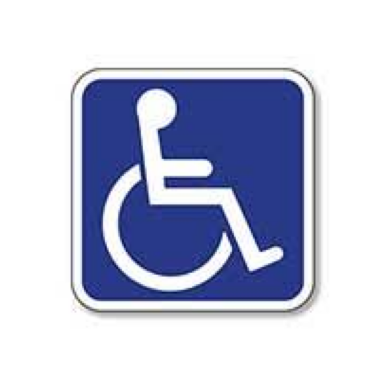

In [30]:
img = cv2.imread('test3.jpg')
bounding_boxes = get_bounding_boxes(img,0, yolo)
img_with_boxes = draw_bounding_boxes(img, bounding_boxes)
show_image(img_with_boxes)